**Task 1**

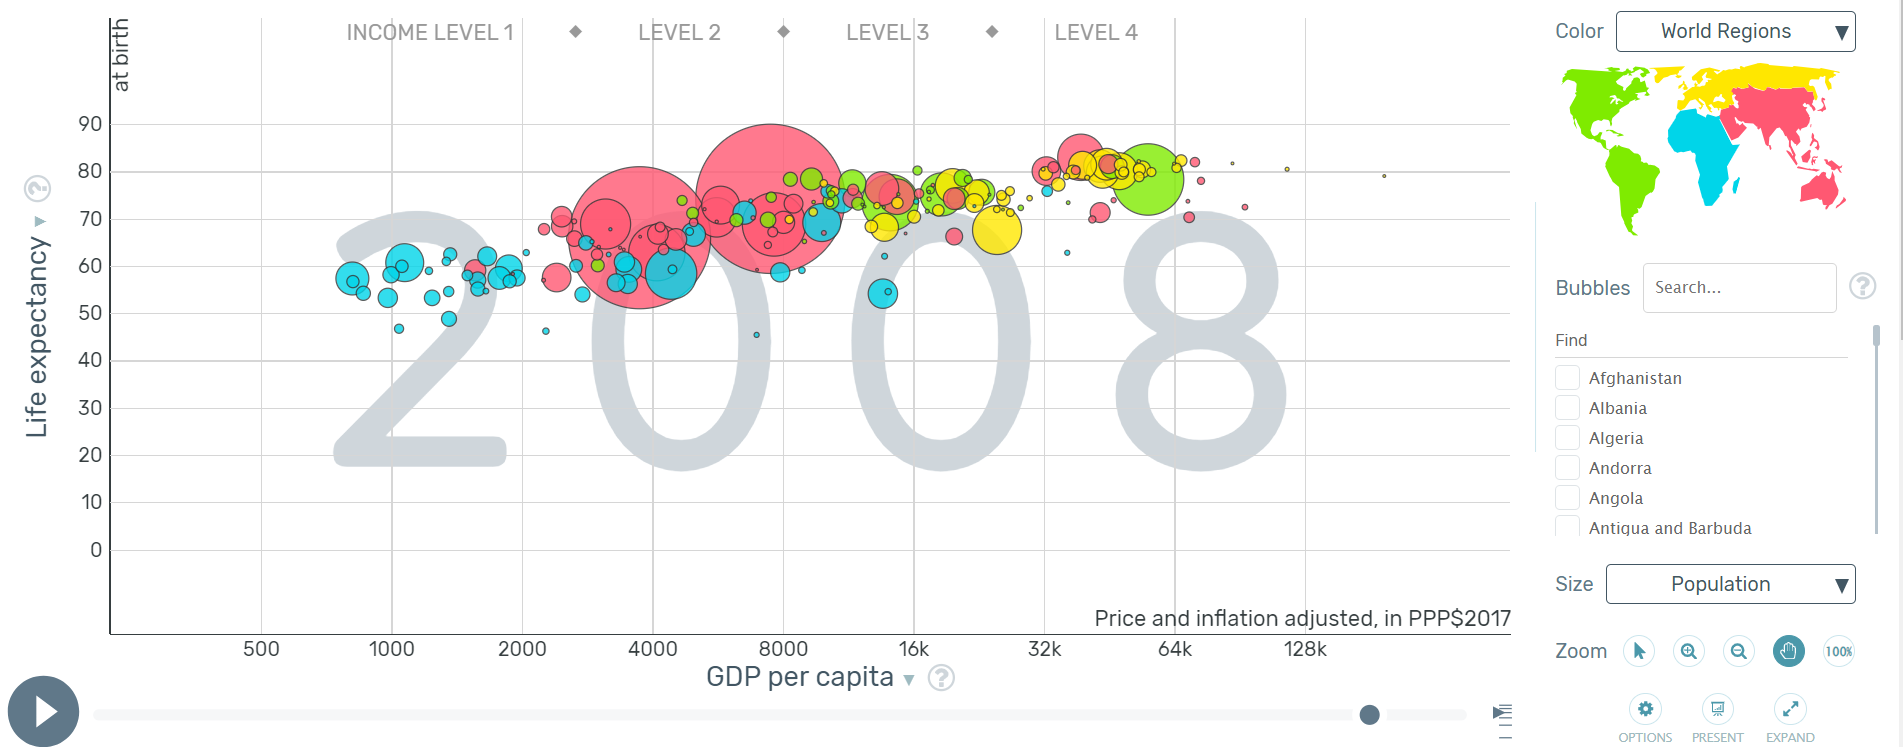

The Aesthetics being used in this visual: X is GDP per Capita, Y is Life Expectancy. The Fill is determined by world region and the size is population



In [161]:
#Downloads
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_boxplot, scale_size, lims, theme_classic, scale_x_log10, scale_size_continuous, scale_y_log10
import plotnine as p9

In [162]:
#import Data
df1 = pd.read_csv("q1data.csv")
# df1.head()

C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


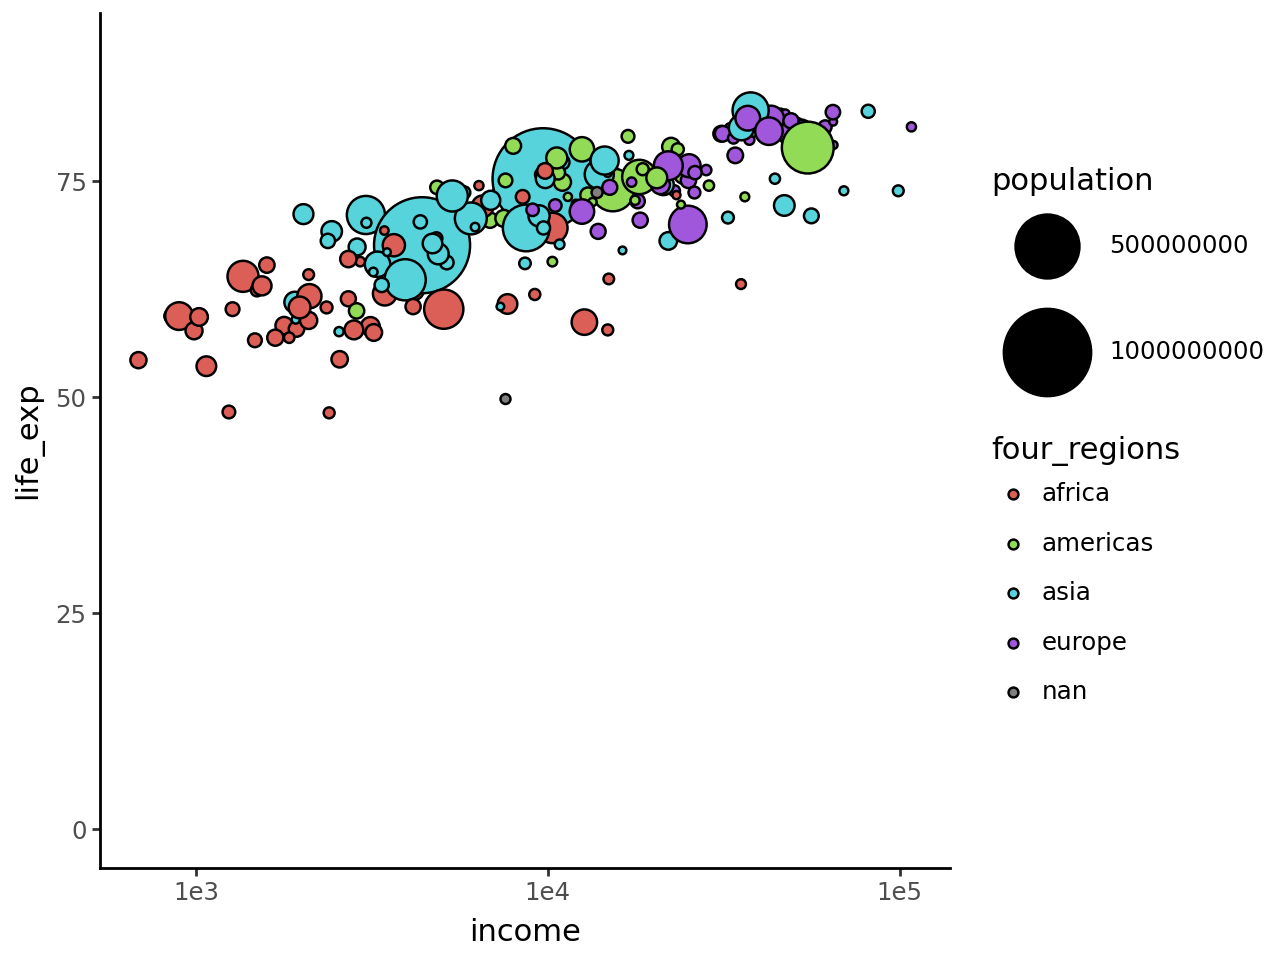

In [163]:
#Create graph

(ggplot(df1, aes(x = "income", y = "life_exp", fill = "four_regions", size = "population"))+ geom_point()+ scale_x_log10() + lims(y = (0,90)) + theme_classic()+ scale_size_continuous(range = (1, 20)))

Making the above graph as a box plot based on income range and color by region

In [178]:
#creating a binned/discrete version of income 

df1["income_float"]= df1["income"].astype(float)
df1["income_int"] = df1["income_float"].round(decimals = -4)
df1["income_notate"] = df1["income_float"]
df1["income_bins"]= df1["income_int"].astype(str)
#df1["income_bins"]

C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


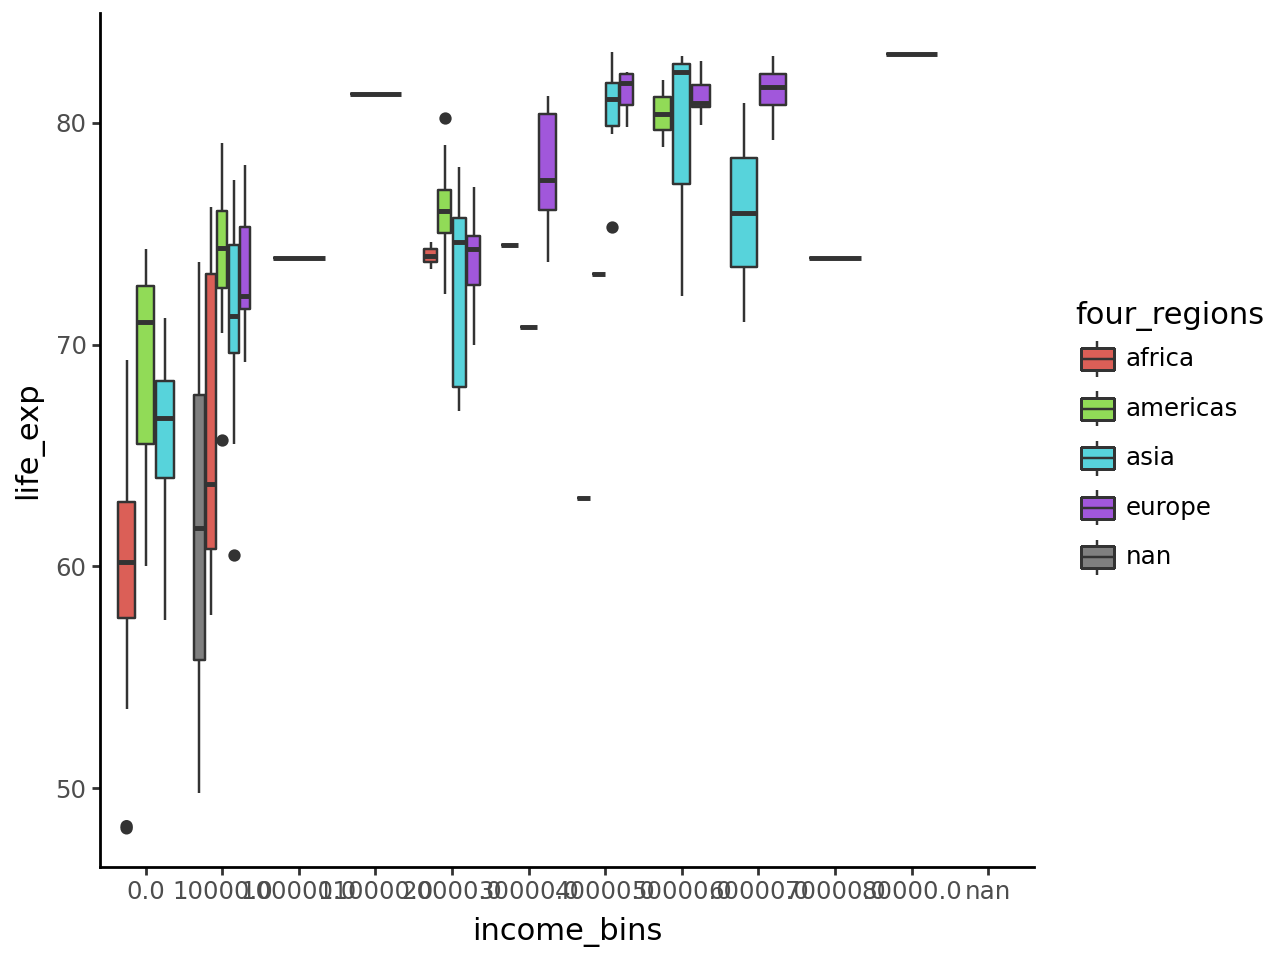

In [165]:
#new plot
(ggplot(df1, aes(x= "income_bins", y = "life_exp", fill = "four_regions")) + p9.geom_boxplot()  +theme_classic())

The above graph is a representation of life expectancy relative to income across the world. Because it is a box plot a lot of data from the bubble plot is lost, however it is still easy to see that more income is related to a longer life expectancy. The population element is completely lost, and it is very difficult to see many countries that may not show up. The bubble chart is definitely a better choice to represent this data. 

**Task 2**

The aesthetics in this graph are the exports as a % of GDP on the X axis, and the imports as a % of GDP on the y axis, the color of the fill is determined by the world region and the size of the point is determined by the energy use of the country. 

In [166]:
#import Data
df2 = pd.read_csv("Data\q2data.csv")
# df2.head()

In [167]:
#converting the energy strin to a float variable so it can be plotted

import numpy as np

energy = df2["energy"].to_numpy()
energy[energy == '12.4k']= 12400
energy[energy == '18.8k']= 18800
energy[energy == '19.3k']= 19300
energy[energy == '11.2k']= 11200
# energy.astype(float)
# energy
# df2["energy"]
df2["energy"] = energy
# pd.to_numeric(df2["energyFloat"])
# # df2["energyFloat"]


In [168]:

# Convert all variables to numeric, above code was not fully enough to get ggplot to work
#so chatgpt helped create this code. The errors = 'coerce' seemed to do the trick 
df2['exports'] = pd.to_numeric(df2['exports'], errors='coerce')
df2['imports'] = pd.to_numeric(df2['imports'], errors='coerce')
df2['energy'] = pd.to_numeric(df2['energy'], errors='coerce')


C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 78 rows containing missing values.


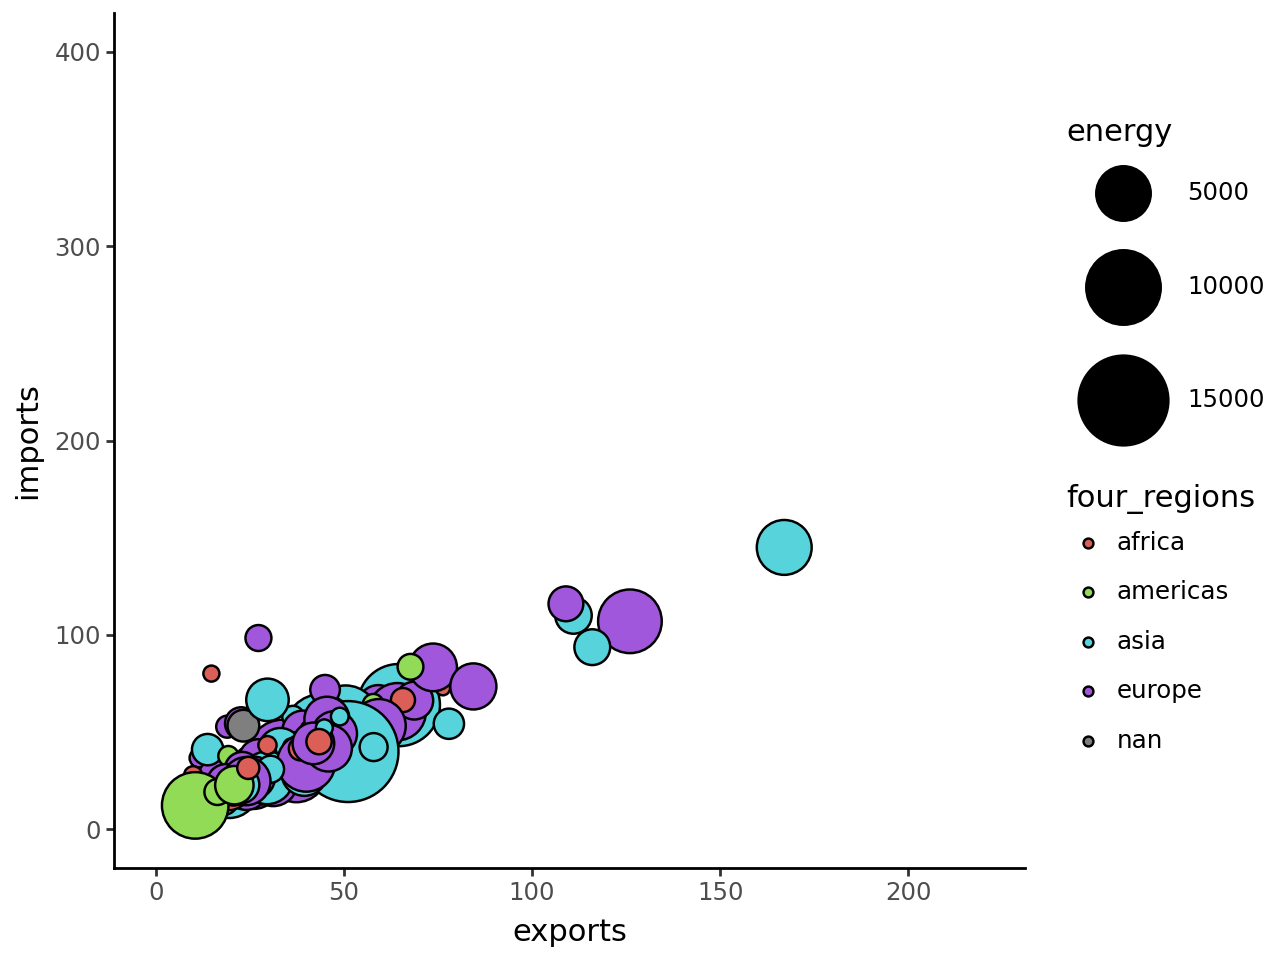

In [169]:
#recreating graph 2

(ggplot(df2, aes(x = "exports", y ="imports", fill = "four_regions", size = "energy")) +  geom_point() + lims(x = (0, 220), y =(0,400))+ theme_classic() + p9.scale_size_continuous(range =(1,20)))

Creating a different graph to represent the above information. I want to investigate the relationship between imports & exports 
and energy expenditure. First I tried to create a box plot where the y axis is imports/exports, but most countries lie close to 1
The better option is to add the normalized z score of imports and exports


In [176]:
#create a new column that shows imports + exports
#first need to z score normlize

df2["imports_normal"] = (df2["imports"]- df2["imports"].mean()) /df2["imports"].std()
df2["exports_normal"] = (df2["exports"]- df2["exports"].mean()) /df2["exports"].std()
df2["imports+exports_normalized"] = df2["imports_normal"]+df2["exports_normal"]
df2["imports+exports_normalized"]
#Create bins for energy to compare high and low energy using countries
df2["energy_bins"] = pd.qcut(df2["energy"], q =3)
df2["energy_bins"] = df2["energy_bins"].astype(str)

C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 138 rows containing non-finite values.


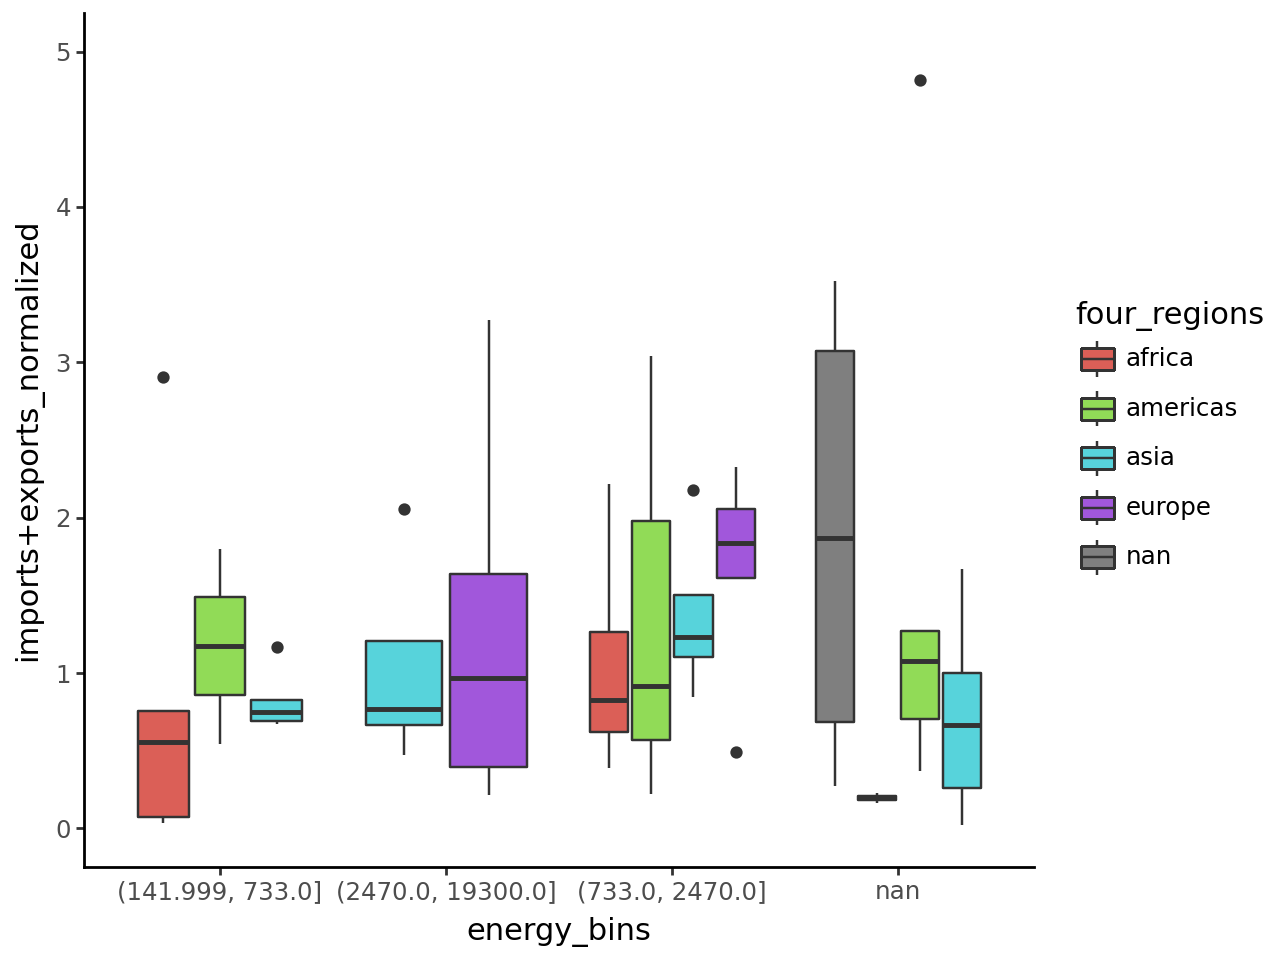

In [177]:
#New graph
(ggplot(df2, aes(x = "energy_bins", y = "imports+exports_normalized", fill = "four_regions"))+ lims( y = (0,5))+ geom_boxplot()+ theme_classic())

The Box plot shows some interesting information, unfortunately there is a lot of nan variables for energy. It seems like there is a slight positive relationship between higher energy and higher imports and exports for countries. There is certainly some information lost in this graph including the relationship of imports to exports as well as specific countries are lost and it is grouped by region instead of country. The bubble chart is likely a better choice for this data as well. 

**Task 3**

The aesthetics of this graph include the number of individuals that use the internet assigned to the x axis, GDP per capita assigned to the y axis, world region is assigned to the fill, and income is assiged to the size of the fill.

In [172]:
#import data
df3 = pd.read_csv("Data\q3data.csv")
# df3

C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


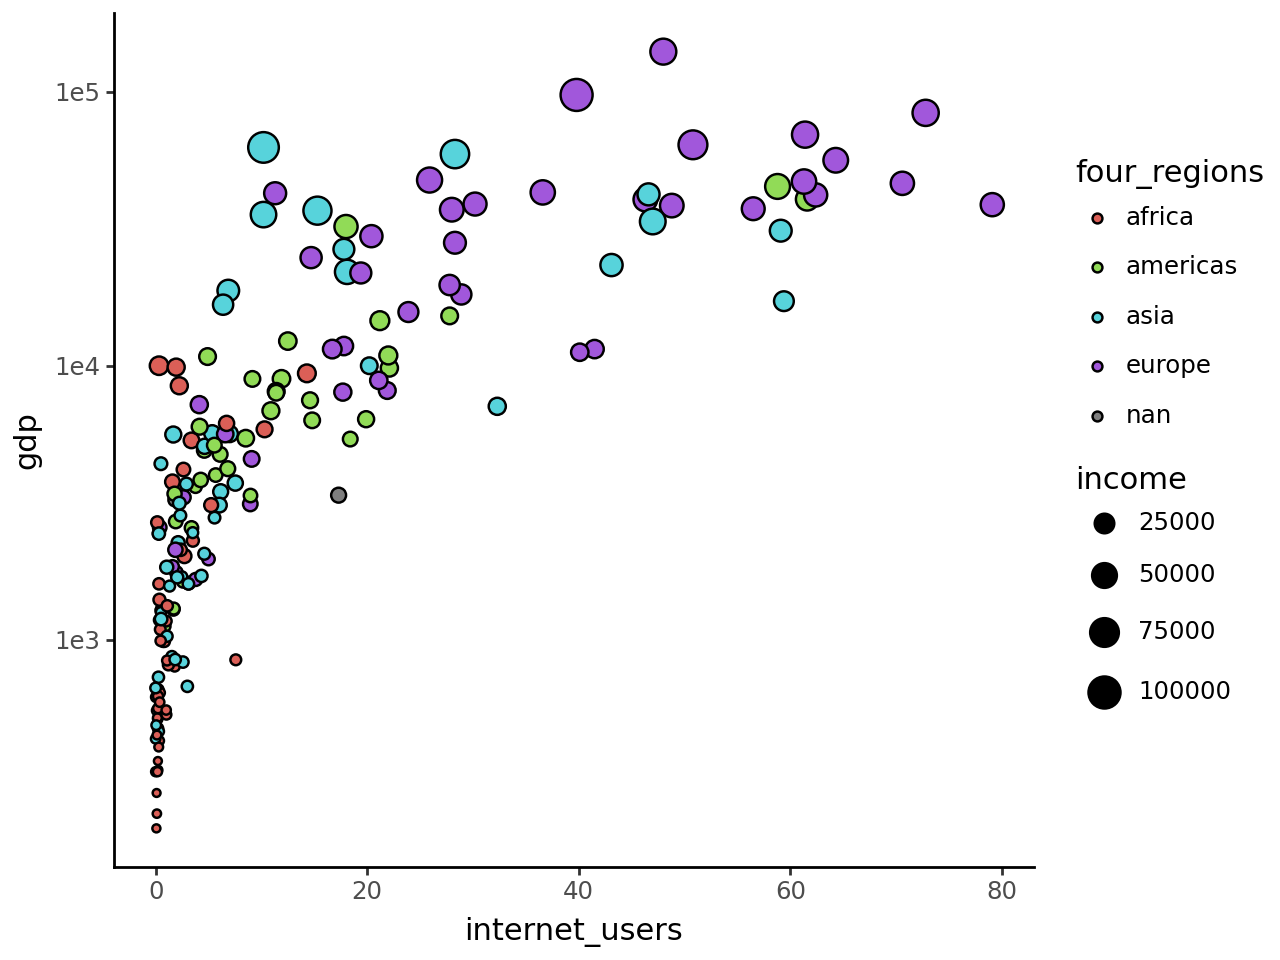

In [173]:
#recreating the graph

(ggplot(df3, aes(x = "internet_users", y = "gdp", fill = "four_regions", size = "income"))+geom_point() + scale_y_log10()+ theme_classic())

Making a new plot representing this information

In [174]:
df3["internet_bins"] = pd.qcut(df3["internet_users"], q =4)
df3["internet_bins"] = df3["internet_bins"].astype(str)

C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 16 rows containing non-finite values.


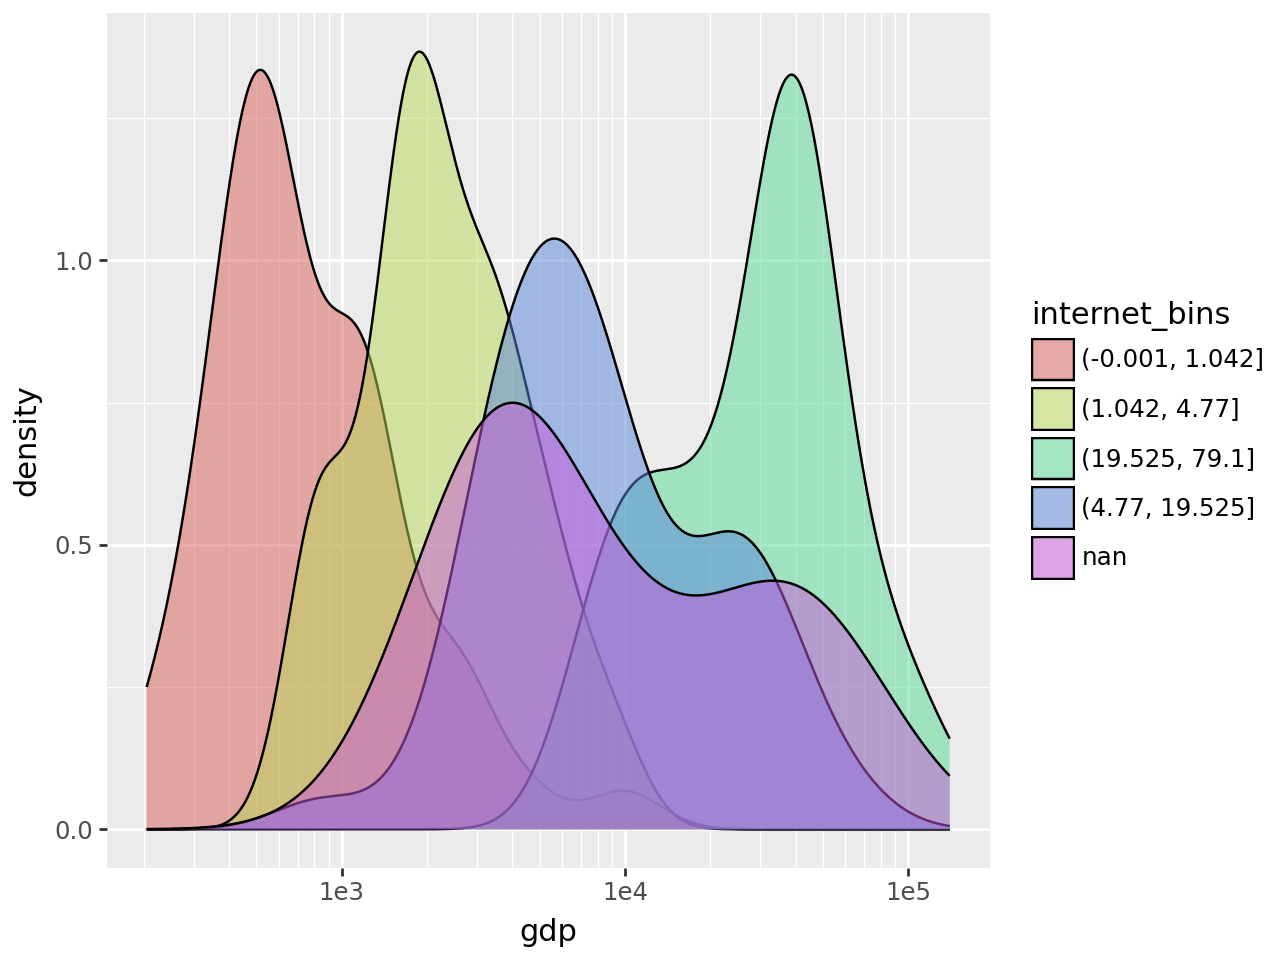

In [175]:
(ggplot(df3, aes(x = "gdp", fill = "internet_bins" )) + p9.geom_density(alpha = 0.5)+ scale_x_log10())

A separate visualization that could be used is the density plot. Although it does include less information (no countries, no world areas, and no income data) I think this one shows more useful data. Income and gdp are somewhat repetitive and the logrithmic axis of the original graph can make it hard to tell what is really happening. The density plot shows very clearly that higher internet usage is associated with higher gdp. I find this one to be more elegant because the first graph makes it seem like after about 10% of internet usage in a country GDP slows down, but this is because of the logrithmic scale. My opinion is that sometimes it is better to have less variables showing than more. 